In [1]:
import orchest

/opt/conda/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
data = orchest.get_inputs()
automl = data["automl"]

In [3]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,XGBoost Classifier w/ Drop Columns Transformer...,6,0.556424,0.025631,0.530816,96.251024,False,{'Drop Columns Transformer': {'columns': ['loc...
1,4,LightGBM Classifier w/ Drop Columns Transforme...,4,0.566485,0.025639,0.540107,96.183239,False,{'Drop Columns Transformer': {'columns': ['loc...
2,3,Random Forest Classifier w/ Drop Columns Trans...,3,0.592860,0.010162,0.582559,96.005531,False,{'Drop Columns Transformer': {'columns': ['loc...
3,1,Elastic Net Classifier w/ Drop Columns Transfo...,1,0.623609,0.023341,0.598650,95.798357,False,{'Drop Columns Transformer': {'columns': ['loc...
4,5,Logistic Regression Classifier w/ Drop Columns...,5,0.623639,0.023390,0.598631,95.798155,False,{'Drop Columns Transformer': {'columns': ['loc...
5,7,Extra Trees Classifier w/ Drop Columns Transfo...,7,0.625672,0.005968,0.619761,95.784456,False,{'Drop Columns Transformer': {'columns': ['loc...
6,8,CatBoost Classifier w/ Drop Columns Transforme...,8,0.642324,0.006164,0.635975,95.672265,False,{'Drop Columns Transformer': {'columns': ['loc...
7,2,Decision Tree Classifier w/ Drop Columns Trans...,2,0.815952,0.100705,0.726748,94.502425,False,{'Drop Columns Transformer': {'columns': ['loc...
9,0,Mode Baseline Binary Classification Pipeline,0,14.842032,0.009823,14.853375,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [4]:
orchest.output(automl.rankings,name='automl_results')

In [5]:
best_pipeline_id = automl.rankings.iloc[0]["id"]
automl.describe_pipeline(best_pipeline_id)


*************************************************************************************************************


* XGBoost Classifier w/ Drop Columns Transformer + Text Featurization Component + Imputer + One Hot Encoder *


*************************************************************************************************************


Problem Type: binary


Model Family: XGBoost


Pipeline Steps


1. Drop Columns Transformer


	 * columns : ['location']


2. Text Featurization Component


3. Imputer


	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


	 * categorical_fill_value : None


	 * numeric_fill_value : None


4. One Hot Encoder


	 * top_n : 10


	 * features_to_encode : None


	 * categories : None


	 * drop : if_binary


	 * handle_unknown : ignore


	 * handle_missing : error


5. XGBoost Classifier


	 * eta : 0.1


	 * max_depth : 6


	 * min_child_weight : 1


	 * n_estimators : 100


	 * n_jobs : -1


	 * eval_metric : logloss


Training


Training for binary problems.


Total training time (including CV): 46.9 seconds


Cross Validation


----------------


             Log Loss Binary    F1 # Training # Validation
0                      0.531 0.675      4,060        2,030
1                      0.582 0.657      4,060        2,030
2                      0.556 0.678      4,060        2,030
mean                   0.556 0.670          -            -
std                    0.026 0.011          -            -
coef of var            0.046 0.017          -            -


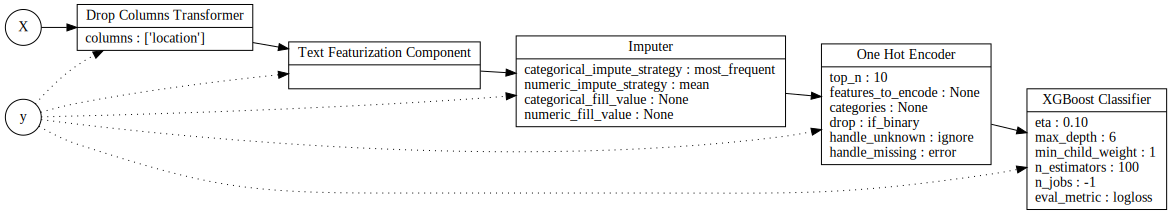

In [6]:
automl.best_pipeline.component_graph.graph()

In [7]:
# !conda install python-graphviz -y